# LDA Implementation 

###### 

As is the LDA... Capable for **multiclass classification**, just to understand the underlying concept — we will implement it just for 2 classes. And then we will take it for 3 classes or more.

While doing the classification for 2 classes, we also will compare the performance of LDA and LogisticRegression on the same dataset.
<br>—<br>
Let's get going.

## 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating the data like the book does. (Not exact)
data = [[], []]
each = 20
# First 20 records with mean=5 std=1
data[0] = np.random.normal(5, 1, each)
data[1] = [0] * each

# Second 20 records with mean=20 std=1
data[0] = np.append(data[0], np.random.normal(20, 1, each))
data[1].extend([1]*each)

In [82]:
df = pd.DataFrame(data).T
df.columns = ['x', 'y']
df['y'] = df['y'].astype(np.int16)

In [83]:
df

,x,y
0,3.259600,0
1,5.045584,0
2,4.922026,0
3,5.499695,0
4,3.455507,0
5,3.670329,0
6,5.575964,0
7,4.569863,0
8,4.920753,0
9,3.848491,0


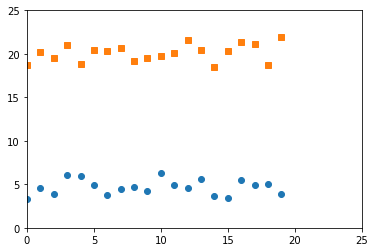

In [81]:
plt.plot(df.x[:each].values, 'o')
plt.plot(df.x[each:].values, 's')
plt.ylim(0, 25)
plt.xlim(0, 25);

# 

As discussed before, we need:
1. Mean
2. Variance
3. Probability
*(For each class)*

# 

#### 1. Mean of each class

*by using this formulae*

## $ \bar x_k = \frac {\sum x_{ik}} {n_k} $

In [78]:
mean_of_each = df.groupby('y').x.mean()
mean_of_each

y
0     4.687367
1    20.137951
Name: x, dtype: float64

##### 

#### 2. Variance of each class

*By using the complete formulae ↓ we will do the job*

## $ \sigma^2_k = \frac {\sum (x_{ik} - \bar x_k)^2} {n-k} $

*but will calculate the $ \sum (x_{ik} - \bar x_k)^2 $ first. **FOR BOTH** classes.<br> And then devide them with $ n - k $ where $ k $ is the number of classes (here 2)*

##### 

    For variance, we have to make a custom function because it has a little different syntax

In [79]:
# Sorting by label, so we can break them apart

df = df.sort_values(by='y')

In [85]:
# Finding the variance for each group (Each xi of each group and their mean)

squared_difference = df.groupby("y").apply(lambda x: ((x.x - x.x.mean()) ** 2).sum())
squared_difference

y
0    15.058698
1    19.520786
dtype: float64

In [86]:
# Summing them up ↑

E_squared_difference = squared_difference.sum()
E_squared_difference

34.5794843258803

In [87]:
# And other parts of the variance functions as well

n = len(df.x)
k = df.y.nunique()

In [88]:
# Now, we got a variance! Which will be same for all classes

variance = E_squared_difference / (n - k)
variance

0.909986429628429

# 

#### 3. Probability of each class

*by using this formulae*

## $ P(y) = \frac {count(y)} {n} $

In [89]:
df.y.value_counts()

1    20
0    20
Name: y, dtype: int64

In [90]:
counts = df.y.value_counts()
probability_of_each = counts / sum(counts)
probability_of_each

1    0.5
0    0.5
Name: y, dtype: float64

# 

Now everything is set up. Let's plug the our nuts in to make predictions. In this ↓ formula.

##### 

##### $$ \text{Discriminant}_k(x) = x \times \frac {\text{mean}_k} {\text{variance}^2_k} - \frac {\text{mean}^2_k} {2 \times \text{variance}^2_k} + ln(P(k)) $$ 

##### 

In [91]:
def discriminant_k(xi):
    disc_by_class = {}
    for class_ in df.y.unique():
        mean = mean_of_each.loc[class_]
        prob = probability_of_each.loc[class_]
        disc = xi * (mean / variance ** 2) - (mean ** 2 / (2 * variance ** 2)) + np.log(prob)
        disc_by_class[class_] = disc
    return disc_by_class

In [92]:
discriminant_k(df.x[0])

{0: 4.49145027942904, 1: -166.29024619418635}

Now, the function `discriminant_k` returns the values for each class from the given `xi`. The class will be decided based on their values. Which one has the higher value, wins.

So, doing that for each values in the df gives us ↓

In [93]:
disc_of_each_xi = pd.DataFrame(discriminant_k(df.x))
disc_of_each_xi.columns = columns=["Disc. Y=0", "Disc. Y=1"]
disc_of_each_xi

,Disc. Y=0,Disc. Y=1
0,4.491450,-166.290246
1,14.601111,-122.856936
2,13.901704,-125.861738
3,17.171631,-111.813419
4,5.600393,-161.525987
5,6.816405,-156.301733
6,17.603359,-109.958621
7,11.908266,-134.425985
8,13.894501,-125.892684
9,7.824903,-151.969006


In [94]:
df = pd.concat([df, disc_of_each_xi], axis=1)
df

,x,y,Disc. Y=0,Disc. Y=1
0,3.259600,0,4.491450,-166.290246
1,5.045584,0,14.601111,-122.856936
2,4.922026,0,13.901704,-125.861738
3,5.499695,0,17.171631,-111.813419
4,3.455507,0,5.600393,-161.525987
5,3.670329,0,6.816405,-156.301733
6,5.575964,0,17.603359,-109.958621
7,4.569863,0,11.908266,-134.425985
8,4.920753,0,13.894501,-125.892684
9,3.848491,0,7.824903,-151.969006


In [95]:
df

,x,y,Disc. Y=0,Disc. Y=1
0,3.259600,0,4.491450,-166.290246
1,5.045584,0,14.601111,-122.856936
2,4.922026,0,13.901704,-125.861738
3,5.499695,0,17.171631,-111.813419
4,3.455507,0,5.600393,-161.525987
5,3.670329,0,6.816405,-156.301733
6,5.575964,0,17.603359,-109.958621
7,4.569863,0,11.908266,-134.425985
8,4.920753,0,13.894501,-125.892684
9,3.848491,0,7.824903,-151.969006


In [98]:
df["Predicted_class"] = df.apply(lambda row:row[["Disc. Y=0", "Disc. Y=1"]].argmax() , axis=1)

In [99]:
df

,x,y,Disc. Y=0,Disc. Y=1,Predicted_class
0,3.259600,0,4.491450,-166.290246,0
1,5.045584,0,14.601111,-122.856936,0
2,4.922026,0,13.901704,-125.861738,0
3,5.499695,0,17.171631,-111.813419,0
4,3.455507,0,5.600393,-161.525987,0
5,3.670329,0,6.816405,-156.301733,0
6,5.575964,0,17.603359,-109.958621,0
7,4.569863,0,11.908266,-134.425985,0
8,4.920753,0,13.894501,-125.892684,0
9,3.848491,0,7.824903,-151.969006,0


Look at this! How cool!!!!

# 

    Now, you know, it was easy for the model to distinguish between to classes, as they both were
    kind of clearly seperatable. 
    
    Let's, make it a function and then we will try the same dataset on LDA and LogReg.
    —
    
    Note: I am not going to implement the function of LDA with more than one feature. We have to
    work with only single feature for now. Because in the book, they have implemented with only
    single feature.
    
    For more than one feature, we have to find the covariance matrix. Which, to be honest, I don't
    know how while I am typing this.
    
**Quick Tip**: LDA is a techniqe which also is used for ***Dimentionality Reuction*** as PCA.

# 

In [316]:
%%writefile LDA.py

class LDA:
    """
    This class is intended to give the hands on LDA.
    
    Note:
    → Only one feature x is supported.
    → Give labels with features as it is supervised.
    
    Good:
    → Available with built in prediction
    → Available with accuracy method.
    
    How:
    >>> model = LDA(x, y)
    >>> model.predict(new_x)
    >>> model.accuracy(real_y)
    
    """
    
    def __init__(self, x, y):
        self._df = pd.DataFrame({"x":x, "y":y})
        self._means = self._get_mean()
        self._variance = self._get_variance()
        self._probs = self._get_probs()
    
    def _get_mean(self):
        return self._df.groupby('y').x.mean()

    def _get_variance(self):
        squared_difference = self._df.groupby("y").apply(lambda x: ((x.x - x.x.mean()) ** 2).sum())
        E_squared_difference = squared_difference.sum()
        n = len(self._df.x)
        k = self._df.y.nunique()
        return E_squared_difference / (n - k)

    def _get_probs(self):
        counts = self._df.y.value_counts()
        return counts / sum(counts)
    
    def predict(self, xi):
        disc_by_class = {}
        for class_ in self._df.y.unique():
            mean = self._means.loc[class_]
            prob = self._probs.loc[class_]
            variance = self._variance
            disc = xi * (mean / variance ** 2) - (mean ** 2 / (2 * variance ** 2)) + np.log(prob)
            disc_by_class[class_] = disc
            
        pred_df = pd.DataFrame(disc_by_class)
        self._new_df = pd.concat([xi, pred_df], axis=1)
        self._new_df["Predicted_class"] = self._new_df.apply(lambda row:row[1:].argmax(), axis=1)
        return self._new_df
    
    def accuracy(self, real_y):
        if hasattr(self, '_new_df'):
            real_y = np.array(real_y)
            if len(real_y) == len(self._new_df.Predicted_class):
                right_preds = (real_y == self._new_df.Predicted_class ).sum()
                acc = (right_preds / self._new_df.shape[0]) * 100
                return str(round(acc, 2)) + " %"
            else: print("Size mismatched. Please provide `true_y` same as the length of provided features' length.")
        else: print("Please predict first. Then run this method")

Writing LDA.py


In [164]:
model = LDA(df.x, df.y)

In [165]:
model.predict(df.x)

,x,0,1,Predicted_class
0,3.259600,4.491450,-166.290246,0
1,5.045584,14.601111,-122.856936,0
2,4.922026,13.901704,-125.861738,0
3,5.499695,17.171631,-111.813419,0
4,3.455507,5.600393,-161.525987,0
5,3.670329,6.816405,-156.301733,0
6,5.575964,17.603359,-109.958621,0
7,4.569863,11.908266,-134.425985,0
8,4.920753,13.894501,-125.892684,0
9,3.848491,7.824903,-151.969006,0


In [166]:
model.accuracy(df.y)

'100.0 %'

# 

So now that we have the class to run the LDA. Let's take one more dataset, and have our thing done.<br>
Note: This class has a couple of dependencies. Please make sure what you are doing. 

# New data 

In [219]:
def new_data(mean, std, each):
    data = [[], []]
    
    for i, (mean, std) in enumerate(zip(mean, std)):
        data[0] = np.append(data[0], np.random.normal(mean, std, each))
        data[1].extend([i] * each)
    
    return data

# 

In [234]:
each = 200
df = pd.DataFrame(new_data([5, 10, 15, 20], [1, 1, 1, 1], each)).T
df.columns = ['x', 'y']
df['y'] = df['y'].astype(np.int16)

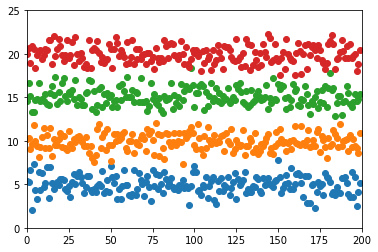

In [245]:
for i in df.y.unique():
    plt.plot(df.x[each * (i) : each * (i+1)].values, 'o')

plt.ylim(0, 25)
plt.xlim(0, each);

In [246]:
model = LDA(df.x, df.y)

In [247]:
model.predict(df.x)

,x,0,1,2,3,Predicted_class
0,5.395471,12.460685,2.765300,-32.679504,-88.808510,0
1,5.254374,11.790527,1.425496,-34.721685,-91.503326,0
2,6.643153,18.386687,14.612764,-14.621139,-64.979094,0
3,2.034098,-3.504529,-29.152899,-81.330463,-153.007231,0
4,7.391396,21.940550,21.717767,-3.791418,-50.688434,0
...,...,...,...,...,...,...
795,19.772103,80.744091,139.279803,175.401203,185.770157,3
796,19.987981,81.769428,141.329693,178.525724,189.893206,3
797,18.011156,72.380278,122.558585,149.914072,152.137907,3
798,18.795619,76.106174,130.007523,161.268033,167.120340,3


In [248]:
model.accuracy(df.y)

'99.5 %'

Look at this! Even after 4 classes, it gives nice accuracy! Let's give it a new data and then check the accuracy.

In [249]:
each = 200
df = pd.DataFrame(new_data([5, 10, 15, 20], [1, 1, 1, 1], each)).T
df.columns = ['x', 'y']
df['y'] = df['y'].astype(np.int16)

In [250]:
model.predict(df.x)
model.accuracy(df.y)

'99.38 %'

See? On the new data, it gives nice one! I want more... let's scramble the data up more and have 10 classes!

In [319]:
each = 200
df = pd.DataFrame(new_data(np.arange(2, 21, 2), [1]*10, each)).T
df.columns = ['x', 'y']
df['y'] = df['y'].astype(np.int16)

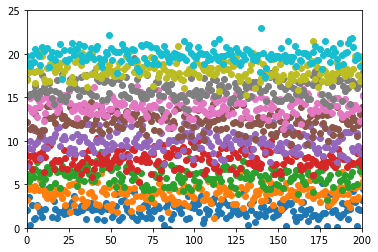

In [320]:
for i in df.y.unique():
    plt.plot(df.x[each * (i) : each * (i+2)].values, 'o')

plt.ylim(0, 25)
plt.xlim(0, each);

In [254]:
model = LDA(df.x, df.y)

In [255]:
model.predict(df.x)

,x,0,1,2,3,4,5,6,7,8,9,Predicted_class
0,0.715904,-2.843715,-7.444266,-15.001510,-27.384445,-41.214975,-61.592105,-84.116709,-108.462190,-142.040229,-174.381351,0
1,2.418169,0.335039,-0.932817,-5.527050,-14.581158,-25.569857,-42.564141,-61.973874,-83.404423,-113.465480,-142.800838,0
2,1.881329,-0.667439,-2.986322,-8.514994,-18.618909,-30.503831,-48.564957,-68.957021,-91.306847,-122.477049,-152.760330,0
3,1.444999,-1.482227,-4.655356,-10.943517,-21.900687,-34.514036,-53.442263,-74.632741,-97.729731,-129.801417,-160.855144,0
4,1.133578,-2.063764,-5.846593,-12.676822,-24.242984,-37.376232,-56.923335,-78.683663,-102.313925,-135.029025,-166.632642,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.713511,34.499158,69.049923,96.301073,123.024020,142.578309,161.941649,176.009455,185.907560,193.645767,196.615298,9
1996,19.738578,32.678600,65.320641,90.874795,115.691233,133.617929,151.043822,163.327657,171.556302,177.280239,178.528288,9
1997,19.449844,32.139427,64.216185,89.267762,113.519572,130.964244,147.816347,159.571845,167.306067,172.433463,173.171682,9
1998,19.614360,32.446638,64.845485,90.183422,114.756947,132.476269,149.655307,161.711842,169.727778,175.195073,176.223784,9


In [256]:
model.accuracy(df.y)

'71.45 %'

### Aah... that's not good with 10 classes... but still it works! 

# 

Now, making a data which has some overlap, let's check the accuracy between LogReg and LDA.

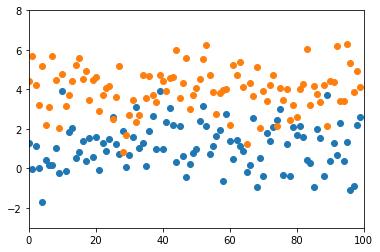

In [267]:
each = 100
df = pd.DataFrame(new_data([1, 4], [1.2, 1.2], each)).T
df.columns = ['x', 'y']
df['y'] = df['y'].astype(np.int16)

for i in df.y.unique():
    plt.plot(df.x[each * (i) : each * (i+1)].values, 'o')

plt.ylim(-3, 8)
plt.xlim(0, each);

Okay, there is some overalp. Let's check with both of them.

## With LDA 

In [268]:
model = LDA(df.x, df.y)
model.predict(df.x)
model.accuracy(df.y)

'88.0 %'

The result is not that good... let's get it done with LogReg.

# 

## With Logistic Regression

In [270]:
# Please don't run this cell.
# I had temproarily copied the file so it ran.
# Now it won't unless you copy.
import logistic_reg

In [312]:
model = logistic_reg.LogisticRegression(df.x.values[:, np.newaxis], df.y)

In [313]:
model.train(epochs=100, learning_rate=0.005)

In [294]:
pred = model.predict(df.x.values[:, np.newaxis])

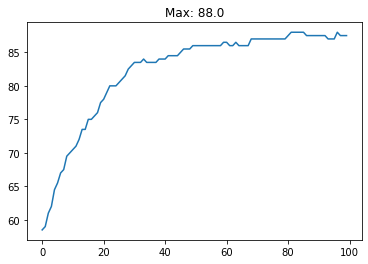

In [314]:
plt.plot(model.accuracies)
plt.title(f"Max: {max(model.accuracies)}");

Oh man!! In our case, Both end up at EXACT 88%. 

# 

# That's it!
Next up, something new will come. I mean... new seciton! <br>
Now, we will learn the Non-Linear models.